In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 从中切分降雨，5min一个降雨强度，2小时，4个rg加起来大于20

In [2]:
raindata = {'1':[],'2':[],'3':[],'4':[]}
strdata = {'1':[],'2':[],'3':[],'4':[]}

for i in raindata.keys():
    with open(i+'Astlingen_Erft'+i+'.txt','r') as f:
        for line in f.readlines():
            strdata[i].append([line.replace('\n','').split(' '*4)[0],str(float(line.split()[-1]))])
            raindata[i].append(float(line.split()[-1]))

In [3]:
k = 0
date = []
for t in range(120):
    key = str(9+t//60).zfill(2)+':'+str(t % 60).zfill(2)
    if np.mod(k,5)==0:
        date.append('01/01/2000 '+key)
        k=0
    k+=1
print(len(date))

24


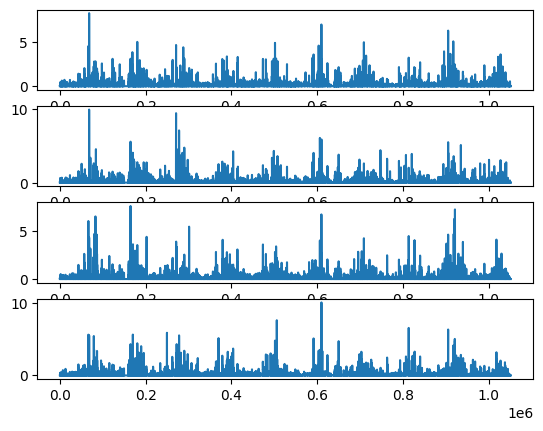

In [4]:
figs, ax = plt.subplots(4,1)
for i in range(4):
    ax[i].plot(raindata[str(i+1)])

In [3]:
lograinid = []
for step in range(len(raindata['1'])-24):
    s = 0
    for i in range(1,5):
        s+=np.sum(raindata[str(i)][step:step+24])
    if s>20 and s<40:
        lograinid.append(step)
print(len(lograinid))

3728


In [6]:
rain = {'1':[],'2':[],'3':[],'4':[]}
for step in lograinid:
    temrain={'1':[],'2':[],'3':[],'4':[]}
    for i in range(4):
        for j in range(24):
            temrain[str(i+1)].append([date[j],raindata[str(i+1)][step+j]])
        rain[str(i+1)].append(temrain[str(i+1)])
for i in range(4):
    #np.save('rain'+str(i+1)+'.npy',rain[str(i+1)])
    np.save('extended_rain'+str(i+1)+'.npy',rain[str(i+1)])

In [7]:
# 选5场降雨
selected_extendrain = []
while len(selected_extendrain) < 5:
    tem = np.random.randint(0,len(rain['1']))
    if tem not in selected_extendrain:
        selected_extendrain.append(tem)
np.save('selected_extendedrain.npy',selected_extendrain)